In [37]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fact
1    45774
0    24107
Name: count, dtype: int64

### Merging all data

In [33]:
final_df=pd.read_csv("../../data/fact.csv")
final_df

,paragraph,file_name,fact
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,0
...,...,...,...
69876,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69877,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69878,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69879,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",1


In [ ]:
def map_fact(value):
    value = str(value).strip()  # Convert to string and strip spaces
    if '0' in value:
        return 0
    elif '1' in value:
        return 1
    else:
        return None  # Use None for values that do not contain '0' or '1'

# Apply the mapping function to the 'fact' column
final_df['fact'] = final_df['fact'].apply(map_fact)

In [34]:
final_df['fact'].value_counts(dropna=False)

fact
1    45774
0    24107
Name: count, dtype: int64

In [124]:


def read_excel_files(folder_path):
    # List to store DataFrames from Excel files
    dfs = []

    # Iterate through all files and subdirectories in the given folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file is an Excel file
            if file.endswith('.xls') or file.endswith('.xlsx'):
                # Construct the full path to the file
                file_path = os.path.join(root, file)
                # Read Excel file into DataFrame
                df = pd.read_excel(file_path)
                df['Paragraph Number'] = "The paragraph number is " + (df.index + 1).astype(str)
                # Append DataFrame to the list
                dfs.append(df)
    
    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

# Specify the folder path containing the Excel files
folder_path = '../../data/reannotation_labeled'

# Call the function to read Excel files and create a DataFrame
result_df = read_excel_files(folder_path)

# Display the combined DataFrame
print(result_df)

                                               paragraph  \
0      1.   What is the scope of the “presumption in ...   
1      2.   The appellant, Barwood Strategic Land II ...   
2      3.   The site of the proposed development is 6...   
3      4.   Barwood’s application for planning permis...   
4      5.   Green J. accepted the council’s argument ...   
...                                                  ...   
70148  4.   Like Sir Ross Cranston on the papers, I h...   
70149  5.   Under Condition 6 the BIA is to involve s...   
70150  6.   That includes acceptability in relation t...   
70151  7.   I have now heard submissions on costs. Th...   
70152  8.   There is a discrete point which has emerg...   

                                               file_name  introduction  \
0      .\data\xml_data\xml_page_1\Barwood Strategic L...             1   
1      .\data\xml_data\xml_page_1\Barwood Strategic L...             1   
2      .\data\xml_data\xml_page_1\Barwood Strategic L... 

In [125]:
result_df.isnull().sum()

paragraph           0
file_name           0
introduction        0
judgement           0
Paragraph Number    0
dtype: int64

In [126]:
result_df.shape

(70153, 5)

In [127]:
result_df.drop_duplicates()

,paragraph,file_name,introduction,judgement,Paragraph Number
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1,0,The paragraph number is 1
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1,0,The paragraph number is 2
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1,0,The paragraph number is 3
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1,0,The paragraph number is 4
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1,0,The paragraph number is 5
...,...,...,...,...,...
70148,"4. Like Sir Ross Cranston on the papers, I h...",".\data\xml_data\xml_page_9\Susan Hall, R (on t...",0,0,The paragraph number is 4
70149,5. Under Condition 6 the BIA is to involve s...,".\data\xml_data\xml_page_9\Susan Hall, R (on t...",0,0,The paragraph number is 5
70150,6. That includes acceptability in relation t...,".\data\xml_data\xml_page_9\Susan Hall, R (on t...",0,0,The paragraph number is 6
70151,7. I have now heard submissions on costs. Th...,".\data\xml_data\xml_page_9\Susan Hall, R (on t...",0,0,The paragraph number is 7


In [128]:
main_new=pd.read_csv("../data/new_main_text.csv")

In [129]:
main_new[['file_name','paragraph']].drop_duplicates().shape

(69860, 2)

In [130]:
result_df=result_df.drop_duplicates(['file_name','paragraph'])

In [131]:
result_df.shape

(69861, 5)

In [132]:
result_df.sort_values(["file_name","paragraph"])

,paragraph,file_name,introduction,judgement,Paragraph Number
807,"1. Climate change, with its consequences for...",.\data\xml_data\xml_page_10\Bristol Airport Ac...,1,0,The paragraph number is 1
816,"10. Beginning at DL45, the Panel addressed t...",.\data\xml_data\xml_page_10\Bristol Airport Ac...,0,0,The paragraph number is 10
906,100. Under the heading “Role of National Pol...,.\data\xml_data\xml_page_10\Bristol Airport Ac...,0,0,The paragraph number is 100
907,101. Under the heading “Local Environmental ...,.\data\xml_data\xml_page_10\Bristol Airport Ac...,0,0,The paragraph number is 101
908,102. 1.23 says that for the majority of loca...,.\data\xml_data\xml_page_10\Bristol Airport Ac...,0,0,The paragraph number is 102
...,...,...,...,...,...
70148,"4. Like Sir Ross Cranston on the papers, I h...",".\data\xml_data\xml_page_9\Susan Hall, R (on t...",0,0,The paragraph number is 4
70149,5. Under Condition 6 the BIA is to involve s...,".\data\xml_data\xml_page_9\Susan Hall, R (on t...",0,0,The paragraph number is 5
70150,6. That includes acceptability in relation t...,".\data\xml_data\xml_page_9\Susan Hall, R (on t...",0,0,The paragraph number is 6
70151,7. I have now heard submissions on costs. Th...,".\data\xml_data\xml_page_9\Susan Hall, R (on t...",0,0,The paragraph number is 7


In [133]:
result_df['introduction'].value_counts(dropna=False)

introduction
0    66432
1     3429
Name: count, dtype: int64

In [134]:
result_df['judgement'].value_counts(dropna=False)

judgement
0    68911
1      950
Name: count, dtype: int64

In [135]:
final_df.sort_values(["file_name","paragraph"])

,paragraph,file_name,fact
491,"1. Climate change, with its consequences for...",.\data\xml_data\xml_page_10\Bristol Airport Ac...,1
500,"10. Beginning at DL45, the Panel addressed t...",.\data\xml_data\xml_page_10\Bristol Airport Ac...,1
590,100. Under the heading “Role of National Pol...,.\data\xml_data\xml_page_10\Bristol Airport Ac...,1
591,101. Under the heading “Local Environmental ...,.\data\xml_data\xml_page_10\Bristol Airport Ac...,1
592,102. 1.23 says that for the majority of loca...,.\data\xml_data\xml_page_10\Bristol Airport Ac...,0
...,...,...,...
67222,"4. Like Sir Ross Cranston on the papers, I h...",".\data\xml_data\xml_page_9\Susan Hall, R (on t...",1
67223,5. Under Condition 6 the BIA is to involve s...,".\data\xml_data\xml_page_9\Susan Hall, R (on t...",1
67224,6. That includes acceptability in relation t...,".\data\xml_data\xml_page_9\Susan Hall, R (on t...",1
67225,7. I have now heard submissions on costs. Th...,".\data\xml_data\xml_page_9\Susan Hall, R (on t...",0


In [136]:
citation_df=pd.read_csv("final_citation.csv")

In [137]:
citation_df.fillna(0,inplace=True)

In [138]:
citation_df['citation'].value_counts(dropna=False)

citation
0.0    48569
1.0    21312
Name: count, dtype: int64

In [139]:
citation_df.shape

(69881, 3)

In [140]:
result_df.shape

(69861, 5)

In [141]:
# citation_regex = r"\b(?:d)?\s?(?:\w+\s+)*\[\d{4}\]\s\w+\s\d+\s?\(?\w+?\)?"
# fact_regex = r"\b(?:Act|s(?:ection)?|Section)\s*(?:\.)?\s*(\d+)(?:\(\d+\))?\b"

# # Apply a lambda function with vectorized string matching
# citation_df["citation"] = citation_df["paragraph"].str.contains(citation_regex, regex=True).astype(int)

In [142]:
new_df=citation_df.merge(result_df,how='left',on=['paragraph','file_name'])

In [145]:
new_df.isnull().sum()

paragraph           0
file_name           0
citation            0
introduction        8
judgement           8
Paragraph Number    8
dtype: int64

In [146]:
new_df.fillna(0,inplace=True)

In [149]:
final_df

,paragraph,file_name,fact
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,0
...,...,...,...
69876,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69877,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69878,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69879,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",1


In [152]:
new_annoattion_df=final_df.merge(new_df,how='left',on=['paragraph','file_name'])

In [154]:
new_annoattion_df.drop_duplicates()

,paragraph,file_name,fact,citation,introduction,judgement,Paragraph Number
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1,1.0,1.0,0.0,The paragraph number is 1
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1,1.0,1.0,0.0,The paragraph number is 2
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1,0.0,1.0,0.0,The paragraph number is 3
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1,1.0,1.0,0.0,The paragraph number is 4
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,0,1.0,1.0,0.0,The paragraph number is 5
...,...,...,...,...,...,...,...
69928,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0,0.0,0.0,0.0,The paragraph number is 75
69929,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0,0.0,0.0,0.0,The paragraph number is 76
69930,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0,0.0,0.0,0.0,The paragraph number is 77
69931,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",1,0.0,0.0,1.0,The paragraph number is 78


In [156]:
new_data=main_new.merge(result_df,how='left',on=['paragraph','file_name'])

In [157]:
new_data.isnull().sum()

paragraph           0
file_name           0
introduction        8
judgement           8
Paragraph Number    8
dtype: int64

In [168]:
new_data.fillna(0,inplace=True)

In [161]:
new_data

,paragraph,file_name,introduction,judgement,Paragraph Number
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 1
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 2
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 3
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 4
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 5
...,...,...,...,...,...
69876,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 75
69877,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 76
69878,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 77
69879,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,1.0,The paragraph number is 78


In [169]:
new_data.merge(final_df.drop_duplicates(['paragraph','file_name','fact']),how='left',on=['paragraph','file_name'])

,paragraph,file_name,introduction,judgement,Paragraph Number,fact
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 1,1
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 2,1
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 3,1
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 4,1
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 5,0
...,...,...,...,...,...,...
69888,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 75,0
69889,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 76,0
69890,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 77,0
69891,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,1.0,The paragraph number is 78,1


In [165]:
final_df.drop_duplicates(['paragraph','file_name','fact'])

,paragraph,file_name,fact
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,0
...,...,...,...
69876,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69877,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69878,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69879,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",1


In [170]:
main_new=pd.read_csv("../../data/new_main_text.csv")

In [176]:
m_ij=main_new.merge(result_df,how='left',on=['paragraph','file_name'])

In [178]:
m_c=main_new.merge(citation_df,how='left',on=['paragraph','file_name']).drop_duplicates()

In [177]:
m_f=main_new.merge(final_df,how='left',on=['paragraph','file_name']).drop_duplicates()

In [183]:
m_ijc=m_ij.merge(m_c,how='left',on=['paragraph','file_name'])

In [186]:
m_ijc

,paragraph,file_name,introduction,judgement,Paragraph Number,citation
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 1,1.0
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 2,1.0
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 3,0.0
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 4,1.0
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 5,1.0
...,...,...,...,...,...,...
69876,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 75,0.0
69877,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 76,0.0
69878,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 77,0.0
69879,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,1.0,The paragraph number is 78,0.0


In [182]:
m_ij.merge(m_f,how='left',on=['paragraph','file_name'])

,paragraph,file_name,introduction,judgement,Paragraph Number,fact
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 1,1
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 2,1
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 3,1
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 4,1
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 5,0
...,...,...,...,...,...,...
69888,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 75,0
69889,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 76,0
69890,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 77,0
69891,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,1.0,The paragraph number is 78,1


In [187]:
m_ijc.merge(main_new,how='left')

,paragraph,file_name,introduction,judgement,Paragraph Number,citation
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 1,1.0
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 2,1.0
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 3,0.0
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 4,1.0
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 5,1.0
...,...,...,...,...,...,...
69928,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 75,0.0
69929,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 76,0.0
69930,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 77,0.0
69931,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,1.0,The paragraph number is 78,0.0


In [190]:
m_ijc.drop_duplicates(['paragraph','file_name'])

,paragraph,file_name,introduction,judgement,Paragraph Number,citation
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 1,1.0
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 2,1.0
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 3,0.0
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 4,1.0
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 5,1.0
...,...,...,...,...,...,...
69876,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 75,0.0
69877,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 76,0.0
69878,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 77,0.0
69879,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,1.0,The paragraph number is 78,0.0


In [191]:
m_ijc.isnull().sum()

paragraph           0
file_name           0
introduction        8
judgement           8
Paragraph Number    8
citation            0
dtype: int64

In [193]:
m_ijc.fillna(0,inplace=True)

In [194]:
m_ijc.to_csv("annotated_milti_label_data.csv",index=False)

In [195]:
m_ijc.index

RangeIndex(start=0, stop=69881, step=1)

In [201]:
m_ijc.drop_duplicates(['file_name','paragraph'])

,paragraph,file_name,introduction,judgement,Paragraph Number,citation
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 1,1.0
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 2,1.0
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 3,0.0
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 4,1.0
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1.0,0.0,The paragraph number is 5,1.0
...,...,...,...,...,...,...
69876,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 75,0.0
69877,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 76,0.0
69878,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,0.0,The paragraph number is 77,0.0
69879,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0.0,1.0,The paragraph number is 78,0.0


In [202]:
m_ijc.index

RangeIndex(start=0, stop=69881, step=1)

In [200]:
main_new.drop_duplicates()

,paragraph,file_name
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...
...,...,...
69876,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ..."
69877,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ..."
69878,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ..."
69879,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ..."


In [205]:
final_df.drop_duplicates(['file_name','paragraph'])

,paragraph,file_name,fact
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...,1
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...,1
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...,0
...,...,...,...
69876,Ground 4\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69877,Conclusions\n\t,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69878,Yesterday I adjourned the hearing for judgment...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",0
69879,For the reasons already given permission is be...,".\data\xml_data\xml_page_9\Carallyn Parkes, R ...",1


In [211]:
m_ijc[['file_name','paragraph']].equals(final_df[['file_name','paragraph']])

True

In [212]:
m_ijc['fact']=final_df['fact']

In [217]:
m_ijc.isnull().sum()

paragraph           0
file_name           0
introduction        0
judgement           0
Paragraph Number    0
citation            0
fact                0
dtype: int64

In [66]:
m_ijc.to_csv("../../data/reannotated_milti_label_data.csv",index=False)

In [63]:
m_ijc.columns

Index(['paragraph', 'file_name', 'introduction', 'judgment',
       'Paragraph Number', 'citation', 'fact'],
      dtype='object')

In [41]:
m_ijc=pd.read_csv("../../data/reannotated_milti_label_data.csv")

C:\Users\deepa\AppData\Local\Temp\ipykernel_1252\1422700546.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values,palette='viridis')


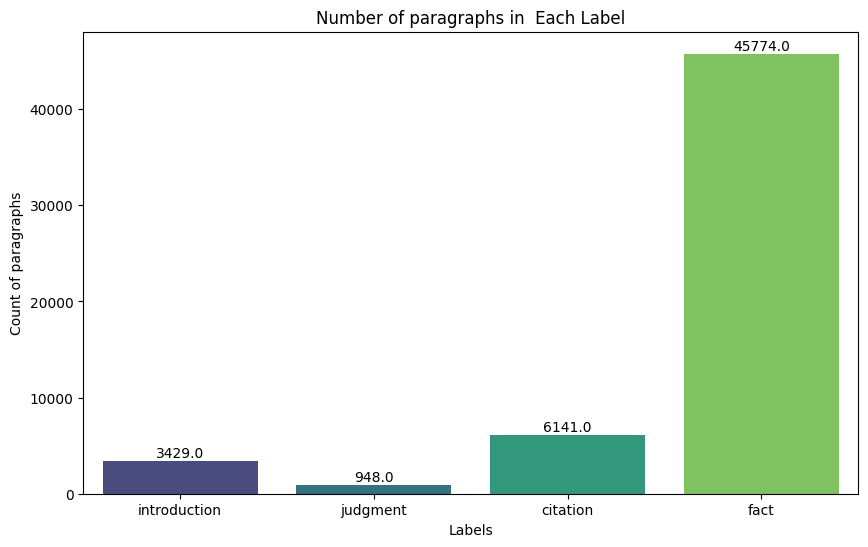

In [67]:
columns_to_count = ['introduction', 'judgment', 'citation', 'fact']

# Count the number of 1s in each column
counts = m_ijc[columns_to_count].sum()

# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.index, y=counts.values,palette='viridis')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Count of paragraphs')
plt.title('Number of paragraphs in  Each Label')
# Add count labels on top of the bars
for i, count in enumerate(counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()